<a href="https://colab.research.google.com/github/piikkkuuuu/ProgrammingAssignment2/blob/master/Prodigy_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Sentiment Analysis Results ---
                                               tweet  sentiment_score  \
0  I love the new features in the iPhone 15! It's...         0.356818   
1  The new update ruined my phone. Very disappoin...        -0.512879   
2  Just bought the latest Samsung Galaxy. Amazing...         0.625000   
3  Terrible customer service from the company. Ne...        -0.750000   
4  The camera on the Pixel 8 is absolutely stunni...         0.812500   
5  Neutral thoughts on the new software, it's jus...         0.318182   
6  This product is neither good nor bad, just ave...        -0.050000   

  sentiment  
0  Positive  
1  Negative  
2  Positive  
3  Negative  
4  Positive  
5  Positive  
6   Neutral  




/tmp/ipython-input-1-1537798692.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])


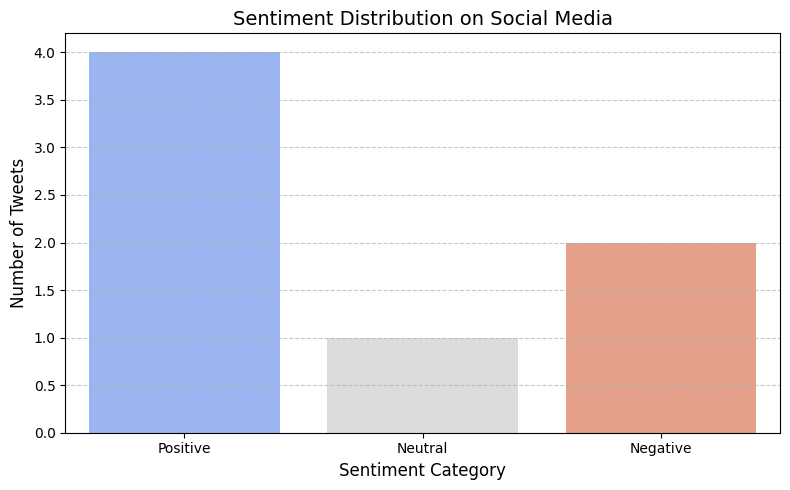

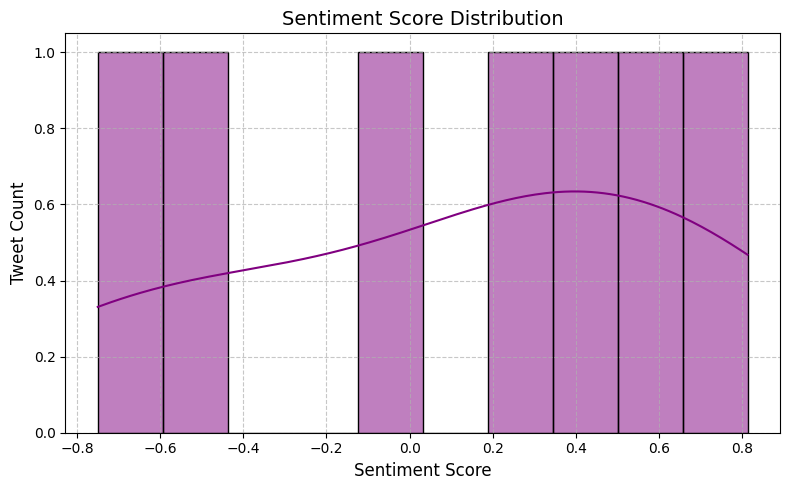

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Sample social media data (replace with real data from API or CSV)
data = {
    'username': ['user1', 'user2', 'user3', 'user4', 'user5', 'user6', 'user7'],
    'tweet': [
        "I love the new features in the iPhone 15! It's fantastic.",
        "The new update ruined my phone. Very disappointed and frustrated.",
        "Just bought the latest Samsung Galaxy. Amazing performance and sleek design!",
        "Terrible customer service from the company. Never buying again, utterly useless.",
        "The camera on the Pixel 8 is absolutely stunning! Best photos ever.",
        "Neutral thoughts on the new software, it's just okay.",
        "This product is neither good nor bad, just average."
    ]
}

# Load data into DataFrame
df = pd.DataFrame(data)

# Function to get sentiment polarity
# Polarity ranges from -1 (negative) to +1 (positive)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to each tweet
df['sentiment_score'] = df['tweet'].apply(get_sentiment)

# Categorize sentiment based on score thresholds
# Scores > 0.1 are Positive
# Scores < -0.1 are Negative
# Scores between -0.1 and 0.1 (inclusive) are Neutral
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization function
df['sentiment'] = df['sentiment_score'].apply(categorize_sentiment)

# Print the analysis results: tweet, sentiment score, and categorized sentiment
print("--- Sentiment Analysis Results ---")
print(df[['tweet', 'sentiment_score', 'sentiment']])
print("\n" + "="*40 + "\n") # Separator for better readability

# --- Visualization 1: Sentiment Distribution ---
plt.figure(figsize=(8, 5)) # Set the figure size for better aesthetics
# Create a countplot to show the distribution of sentiment categories
sns.countplot(data=df, x='sentiment', palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution on Social Media', fontsize=14) # Add a title
plt.xlabel('Sentiment Category', fontsize=12) # Label for x-axis
plt.ylabel('Number of Tweets', fontsize=12) # Label for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for readability
plt.xticks(fontsize=10) # Adjust x-axis tick font size
plt.yticks(fontsize=10) # Adjust y-axis tick font size
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

# --- Visualization 2: Sentiment Score Distribution ---
plt.figure(figsize=(8, 5)) # Set the figure size
# Create a histogram with KDE (Kernel Density Estimate) to show score distribution
sns.histplot(df['sentiment_score'], bins=10, kde=True, color='purple', edgecolor='black')
plt.title('Sentiment Score Distribution', fontsize=14) # Add a title
plt.xlabel('Sentiment Score', fontsize=12) # Label for x-axis
plt.ylabel('Tweet Count', fontsize=12) # Label for y-axis
plt.grid(linestyle='--', alpha=0.7) # Add a grid
plt.xticks(fontsize=10) # Adjust x-axis tick font size
plt.yticks(fontsize=10) # Adjust y-axis tick font size
plt.tight_layout() # Adjust layout
plt.show() # Display the plot
